<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import astar as ast

**Weighted Undirected Graph**

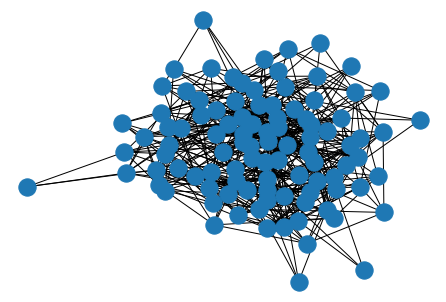

In [2]:
G = nx.gnm_random_graph(100, 500)
nx.draw(G)
plt.show()

In [3]:
for (u, v) in G.edges():
  G.edges[u, v]['weight'] = np.random.randint(0,100)

In [4]:
adj = nx.adjacency_matrix(G).toarray()
adj

array([[ 0,  0, 72, ...,  0,  0, 88],
       [ 0,  0, 61, ...,  0,  0, 18],
       [72, 61,  0, ..., 26,  0,  0],
       ...,
       [ 0,  0, 26, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [88, 18,  0, ...,  0,  0,  0]], dtype=int64)

**Shortest Path: Dijkstra's, Bellman-Ford, A* Algorithms**

In [5]:
elapsed_dijkstra = []
elapsed_bellman = []
elapsed_astar = []
source = np.random.randint(0, 100)
for i in range(10):
  target = np.random.randint(0, 100)

  start_time = time.time()
  dijkstra_path = nx.shortest_path(G, source=source, target=target, weight='weight' ,method='dijkstra')
  elapsed_dijkstra.append(time.time() - start_time)

  start_time = time.time()
  bellman_path = nx.shortest_path(G, source=source, target=target, weight='weight', method='bellman-ford')
  elapsed_bellman.append(time.time() - start_time)

  start_time = time.time()
  astar = nx.astar_path(G, source=source, target=target, weight='weight')
  elapsed_astar.append(time.time() - start_time)

In [6]:
print("Average time (Dijkstra's Algorithm): ", np.average(elapsed_dijkstra))
print("Average time (Bellman-Ford Algorithm): ", np.average(elapsed_bellman))
print("Average time (A* Algorithm): ", np.average(elapsed_astar))

Average time (Dijkstra's Algorithm):  0.0003728389739990234
Average time (Bellman-Ford Algorithm):  0.003099226951599121
Average time (A* Algorithm):  0.0006539821624755859


**Find Path: A* Algorithm**

In [7]:
grid = np.zeros((100,1))
grid[:30] = 1
np.random.shuffle(grid)
grid = grid.reshape(10, 10)
grid

array([[1., 1., 1., 1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.]])

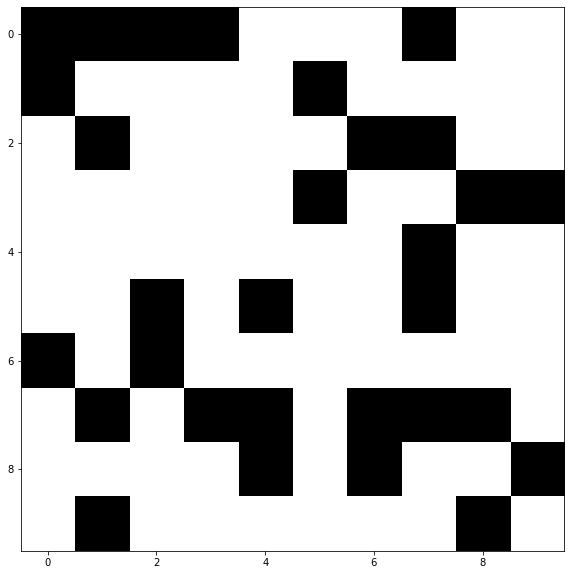

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(grid, cmap=plt.cm.Greys)
plt.show()

In [9]:
source = (np.random.randint(0,10), np.random.randint(0,10))
target = (np.random.randint(0,10), np.random.randint(0,10))
print(source)
print(target)
path = ast.astar(grid, source, target)
if not path:
  print("No path found. Make sure the target is not on an obstacle")
else:
  path = path + [source]
  path = path[::-1]
  print(path)

(4, 9)
(1, 8)
[(4, 9), (4, 8), (3, 7), (2, 8), (1, 8)]


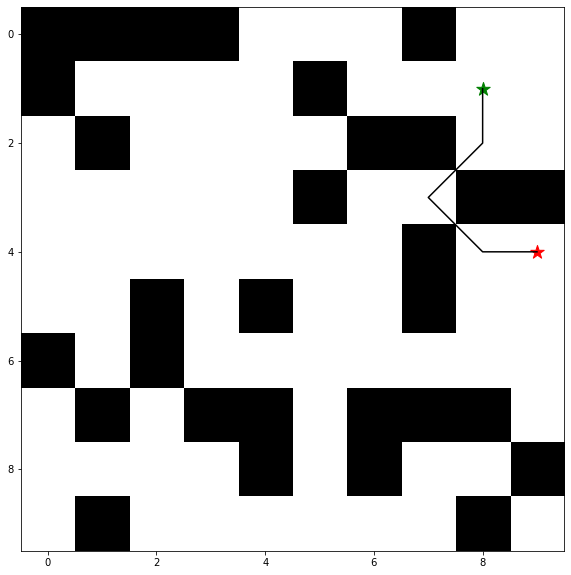

In [10]:
x_coords = []
y_coords = []

for i in (range(0,len(path))):
    x = path[i][0]
    y = path[i][1]
    x_coords.append(x)
    y_coords.append(y)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(grid, cmap=plt.cm.Greys)
ax.scatter(source[1],source[0], marker = "*", color = "red", s = 200)
ax.scatter(target[1],target[0], marker = "*", color = "green", s = 200)
ax.plot(y_coords,x_coords, color = "black")
plt.show()